
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



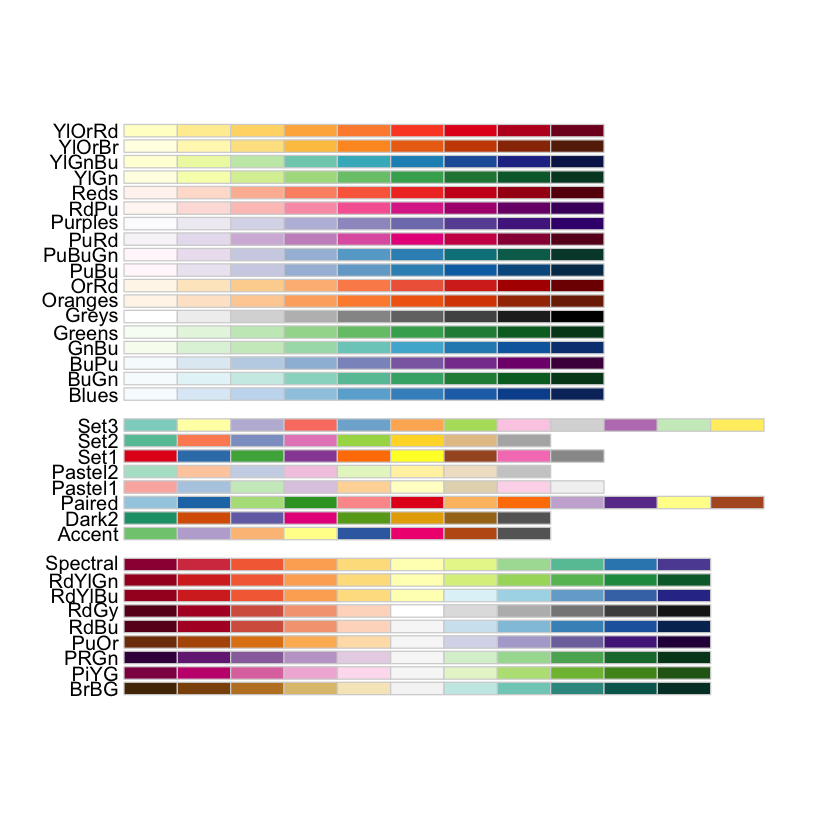

In [1]:
library(ggplot2)
library(dplyr)
library("RColorBrewer")
display.brewer.all()

In [2]:
topramen <- read.csv("Data/The Ramen Rater - The Big List.csv")

In [3]:
head(topramen)

Review..,Brand,Variety,Style,Country,Stars,Top.Ten
2750,Nissin,Cup Noodles Tom Yum Goong Flavour Potato Chips,Pack,Hong Kong,5,
2749,Maruchan,Bariuma Goboten Udon,Bowl,Japan,0,
2748,MyKuali,Penang Red Tom Yum Goong Noodle (2018 Recipe),Pack,Malaysia,5,
2747,Nissin,Cup Noodles Kyushu White Flavour (Open Sesame),Cup,Singapore,3.5,
2746,Ve Wong,Fried Noodles With Mexican Chili Flavor,Pack,Taiwan,4.25,
2745,Nissin,U. F. O. BIG Wasabi-Mayo Yakisoba,Tray,Japan,5,


**BAR CHART**

In [5]:
topeightramen <- topramen %>%
  group_by(Brand) %>%
  summarise(
    count = n(),
  ) %>% arrange(desc(count))
head(topeightramen)

Brand,count
Nissin,405
Nongshim,104
Maruchan,83
Myojo,75
Mama,71
Paldo,69


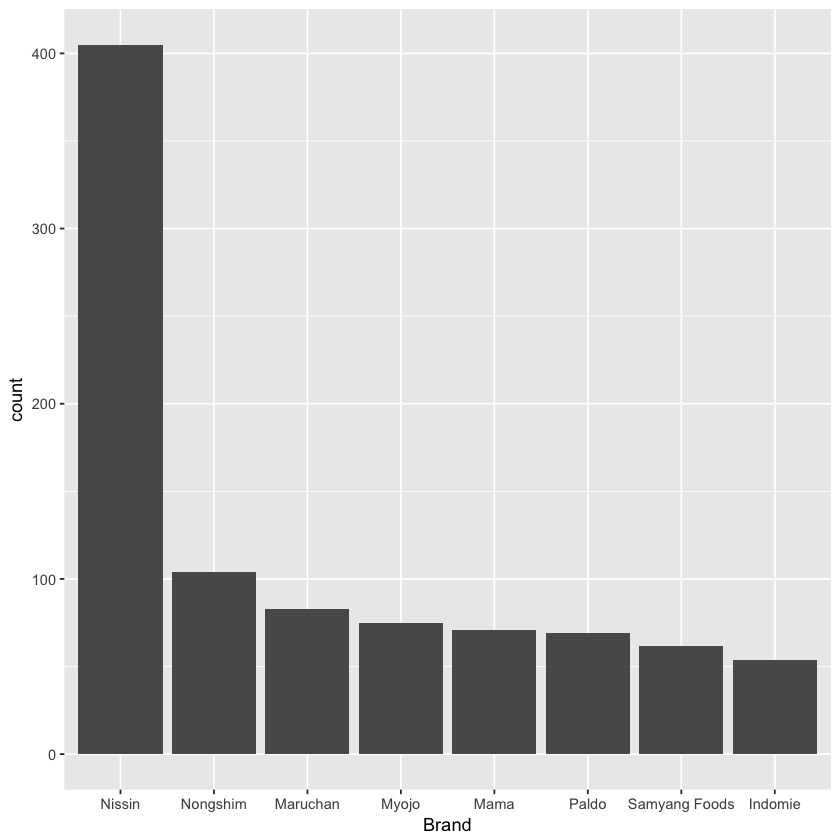

In [6]:
topeightramen <- topramen %>%
  group_by(Brand) %>%
  summarise(
    count = n(),
  ) %>% arrange(desc(count)) %>%
  filter(count > 50) %>% mutate(Brand = factor(Brand, Brand))
ggplot(topeightramen, aes(Brand, weight=count)) + geom_bar()

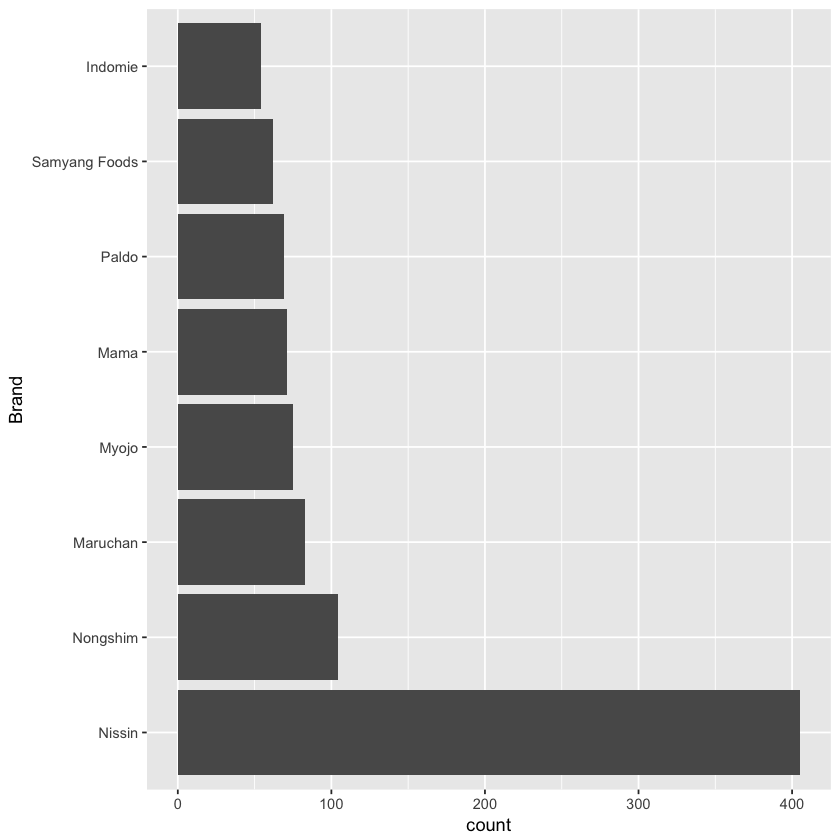

In [7]:
ggplot(topeightramen, aes(Brand, weight=count)) + geom_bar() + coord_flip()

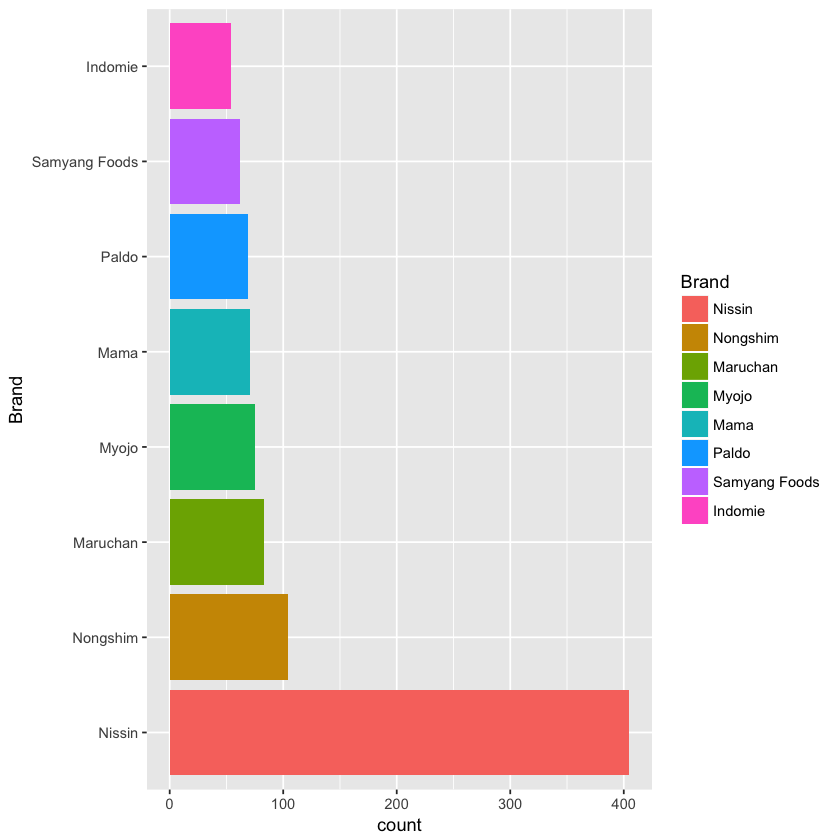

In [8]:
ggplot(topeightramen, aes(Brand, weight=count, fill=Brand)) + geom_bar() + scale_color_brewer("Brand") + coord_flip()

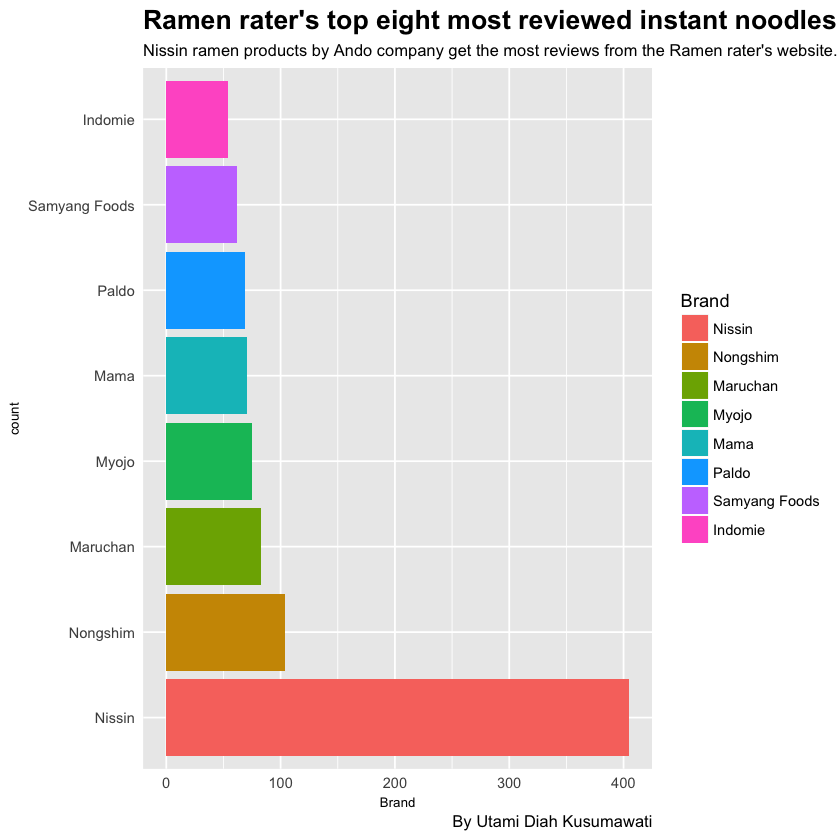

In [10]:
ggplot(topeightramen, aes(Brand, weight=count, fill=Brand)) + geom_bar() + scale_color_brewer("Brand") + coord_flip() + labs(x="count", y="Brand", title="Ramen rater's top eight most reviewed instant noodles in the world", subtitle="Nissin ramen products by Ando company get the most reviews from the Ramen rater's website.", caption="By Utami Diah Kusumawati") +
theme(plot.title = element_text(size = 16, face = "bold"), axis.title = element_text(size = 8), axis.ticks=element_blank())

**Nissin instant noodles products get the most reviews from Ramenrater.com**

Instant noodles have become everyone's, especially youngsters, cooking bestfriend. They are quick to make and tasty since they have a lot of unique flavors from around the world, such as Mexican chili, Japanese wasabi mayo, Indonesian chicken satay with peanuts or Vietnamese Pho Broth.

For those who do not have a lot of time preparing food, having instant noodles in your kitchen cupboard really help to tackle the sudden food craving in the middle of doing the piling tasks from work or school. 

Just grab one ramen from your cupboard, tear the plastic, mix the seasoning and additional ingredients like fried onions, chips, chopped sausages or meatballs or fried peanuts, and boil the noodle. Less than five minutes, it is ready to serve.

Tracing back to its history, a Japanese man named Momofuku Ando, who founded Nissin food products company, invented the first instant noodle "Chicken Ramen" in 1958. Ando wanted provide masses food for Japanese. Food was scarce at that time because Japan had just lost in the World War II.

The "Chicken Ramen" is also known as the "magic ramen" because people just need to add boiling water for two minutes and voila, they can eat it.

As it became more popular, more flavour were introduced to public. To maintain the quality of the instant noodles products, Japan Convenience Foods Industry Association, in which noodles companies joined, followed a production method standard called "Japan Agricultural Standard". 

Since then, more companies in Asia, Europe and United States of America start to join the euphoria of producing instant noodles with local flavors, according to the World Instant Noodles Association.

Based on the 2017 list from well-known website Ramenrater.com, there are several ramen brands that get the most reviews from the US based instant noodle lover Hans Lienesch, who claimed that he had reviewed 715 instant noodles products since 1998. Those brands are Nissin, Nongshim, Maruchan, Myojo, Mama, Paldo, Samyang Foods and Indomie.

**DOT CHART**

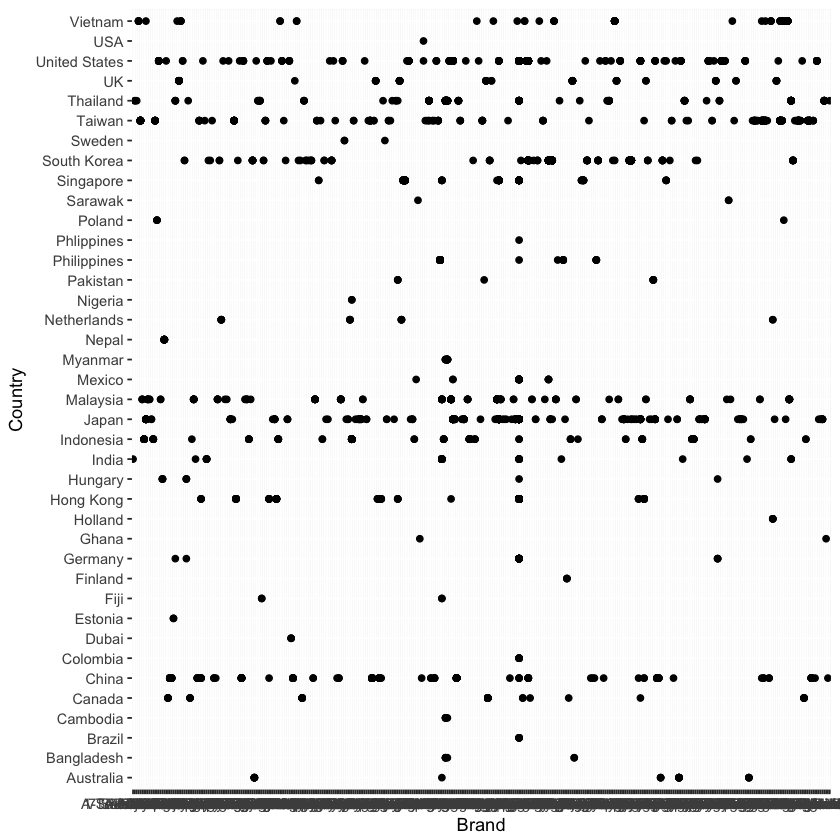

In [12]:
ggplot(topramen, aes(x=Brand, y=Country)) + geom_point()

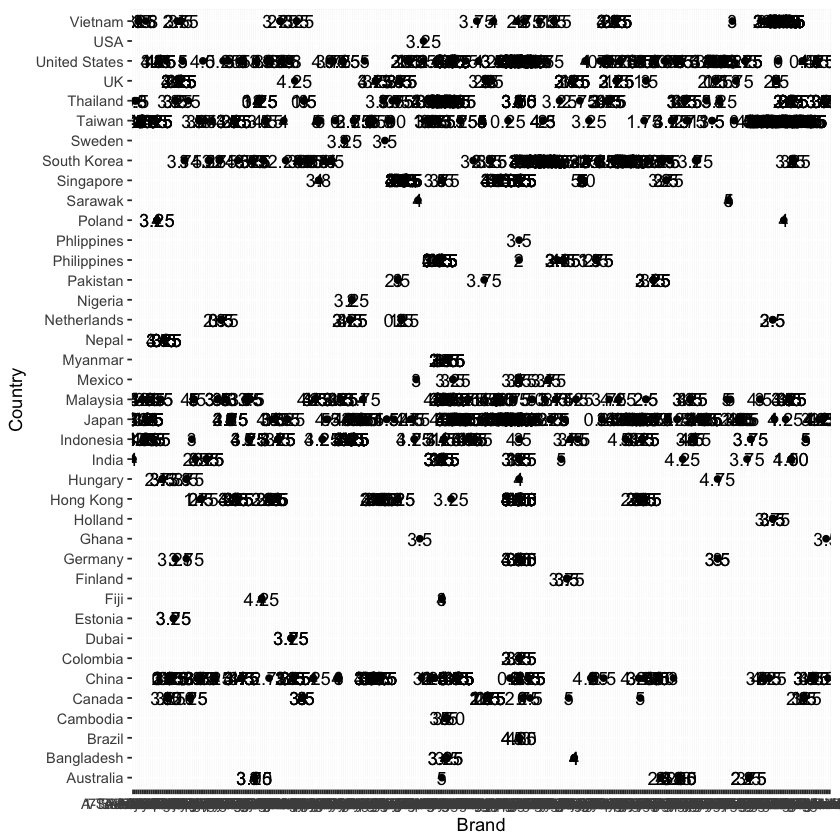

In [13]:
ggplot(topramen, aes(x=Brand, y=Country)) + 
geom_point() + 
geom_text(data=topramen, aes(label=Stars))

In [14]:
ggplot(topramen, aes(x=Brand, y=Country)) + 
geom_point() + 
geom_text(data=subset(topramen, as.numeric(Stars>=4.5), aes(label=Stars)))

Warning message in Ops.factor(Stars, 4.5):
“‘>=’ not meaningful for factors”

ERROR: Error in subset.data.frame(topramen, as.numeric(Stars >= 4.5), aes(label = Stars)): 'subset' must be logical


Warning message in Ops.factor(Stars, 4.5):
“‘>=’ not meaningful for factors”

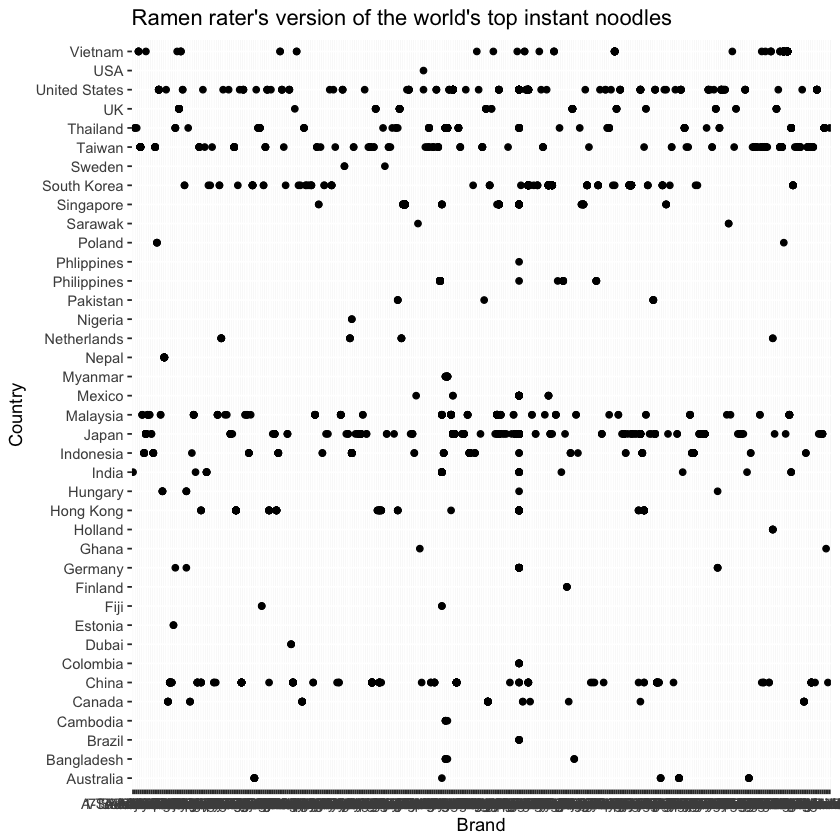

In [15]:
ggplot(topramen, aes(x=Brand, y=Country)) + 
geom_point() + 
geom_text(data=subset(topramen, Stars>=4.5), aes(label=Stars), size=2, nudge_y=1, check_overlap = TRUE) +
labs(x="Brand", y="Country", title="Ramen rater's version of the world's top instant noodles")